In [1]:
from numpy import *
from numpy.fft import fft
import matplotlib.pyplot as plt
from LabFuncs import *
from Params import *
from HaloFuncs import *
from WIMPFuncs import *

dat = loadtxt('../data/gvmin/gvmin_SHMpp.txt')
v_min = dat[0,:]
gmin0 = dat[1:,:]
gmin0_gf = loadtxt('../data/gvmin/gvmin_SHMpp_GF.txt',skiprows=1)
gmin_sub = loadtxt('../data/gvmin/gvmin_Shards.txt',skiprows=1)
gmin_sub_gf = loadtxt('../data/gvmin/gvmin_Shards_GF.txt',skiprows=1)

nt = shape(gmin0)[0]
t = linspace(0,365,nt)


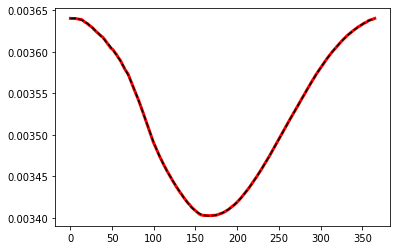

In [2]:
# Checking it works

th = linspace(0,2*pi-2*pi/nt,nt)
nc = 10
a = zeros(shape=(nc,1))
b = zeros(shape=(nc,1))


y = 0.1*gmin_sub_gf[:,0]+0.9*gmin0_gf[:,0]
yfft = fft(y)/(1.0*nt)
yfft = yfft[0:(nc+1)]
a0 = real(yfft[0])
a[:,0] = 2*real(yfft[1:])
b[:,0] = -2*imag(yfft[1:])


def FourierReconstruct(a0,a,b,nt):
    th = linspace(0,2*pi-2*pi/nt,nt)
    nc = size(a)
    n = zeros(shape=(nc,1))
    n[:,0] = arange(1,nc+1) 
    a = repeat(a, nt, axis=1)
    b = repeat(b, nt, axis=1)
    n = repeat(n, nt, axis=1)
    y_rec = a0 + sum(a*cos(n*th)+b*sin(n*th),axis=0)
    return y_rec
    
plt.plot(t,y,'r-',lw=3)
plt.plot(t,FourierReconstruct(a0,a,b,nt),'k--')

In [3]:
from numpy.fft import fft

# Get all fourier components
def FourierComponents(gmin,nc):
    nv = shape(gmin)[1]
    a0 = zeros(shape=nv)
    b = zeros(shape=(nc,nv))
    a = zeros(shape=(nc,nv))
    for i in range(0,nv):
        y = gmin[:,i]
        yfft = fft(y)/(1.0*nt)
        yfft = yfft[0:(nc+1)]
        a0[i] = real(yfft[0])
        a[:,i] = 2*real(yfft[1:])
        b[:,i] = -2*imag(yfft[1:])
    return a0,a,b

nc = 4
a0,a,b = FourierComponents(gmin0_gf,nc) 
a0_gf,a_gf,b_gf = FourierComponents(0.8*gmin0_gf+0.2*gmin_sub_gf,nc)

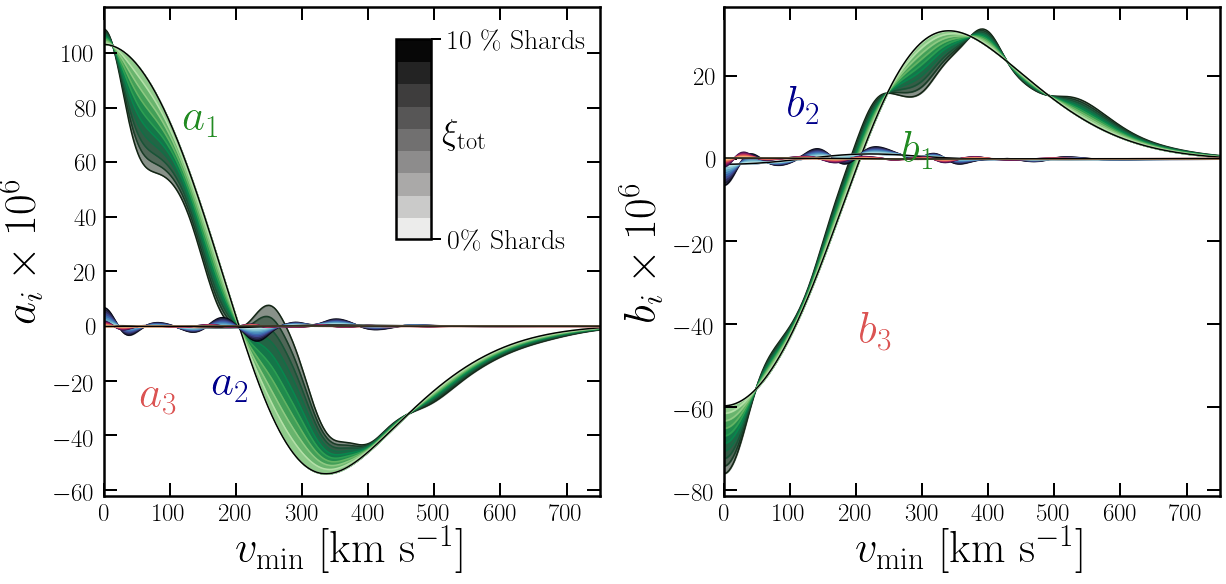

In [4]:
from PlotFuncs import *
from numpy.fft import fft
import matplotlib.cm as cm
import cmocean


fig,ax1,ax2 = MyDoublePlot(r'$v_{\rm min}$ [km s$^{-1}$]',r'$a_i\times 10^6$',r'$v_{\rm min}$ [km s$^{-1}$]',r'$b_i\times 10^6$',size_y=9,wspace=0.25)

n_xi = 10
xi_max = 0.5
xi_vals = flipud(linspace(0.0,xi_max,n_xi))

sc = 1e6


j = 0
zorder=0
col = (cmocean.cm.algae_r(linspace(0,1,n_xi)))
a0,a_1,b_1 = FourierComponents(gmin0,nc) 
ay2 = a_1[j,:]
by2 = b_1[j,:]
for i in range(0,n_xi):
    xi = xi_vals[i]
    a0,a,b = FourierComponents((1-xi)*gmin0+xi*gmin_sub,nc)
    ax1.fill_between(v_min,sc*a[j,:],y2=sc*ay2,color=col[i,:],alpha=0.5,zorder=zorder)
    ax1.plot(v_min,sc*a[j,:],'-',color=col[i,:],zorder=zorder)
    ax2.fill_between(v_min,sc*b[j,:],y2=sc*by2,color=col[i,:],alpha=0.5,zorder=zorder)
    ax2.plot(v_min,sc*b[j,:],'-',color=col[i,:],zorder=zorder)
ax1.plot(v_min,sc*ay2,'k-',lw=1.5,zorder=zorder)
ax2.plot(v_min,sc*by2,'k-',lw=1.5,zorder=zorder)


zorder = zorder+1
j = 1
col = (cmocean.cm.ice(linspace(0,1,n_xi)))
a0,a_1,b_1 = FourierComponents(gmin0,nc) 
ay2 = a_1[j,:]
by2 = b_1[j,:]
for i in range(0,n_xi):
    xi = xi_vals[i]
    a0,a,b = FourierComponents((1-xi)*gmin0+xi*gmin_sub,nc)
    ax1.fill_between(v_min,sc*a[j,:],y2=sc*ay2,color=col[i,:],alpha=0.5,zorder=zorder)
    ax1.plot(v_min,sc*a[j,:],'-',color=col[i,:],zorder=zorder)
    ax2.fill_between(v_min,sc*b[j,:],y2=sc*by2,color=col[i,:],alpha=0.5,zorder=zorder)
    ax2.plot(v_min,sc*b[j,:],'-',color=col[i,:],zorder=zorder)
ax1.plot(v_min,sc*ay2,'k-',lw=1.5,zorder=zorder)
ax2.plot(v_min,sc*by2,'k-',lw=1.5,zorder=zorder)


zorder = zorder+1
j = 2
col = (cmocean.cm.matter_r(linspace(0,1,n_xi)))
a0,a_1,b_1 = FourierComponents(gmin0,nc) 
ay2 = a_1[j,:]
by2 = b_1[j,:]
for i in range(0,n_xi):
    xi = xi_vals[i]
    a0,a,b = FourierComponents((1-xi)*gmin0+xi*gmin_sub,nc)
    ax1.fill_between(v_min,sc*a[j,:],y2=sc*ay2,color=col[i,:],alpha=0.5,zorder=zorder)
    ax1.plot(v_min,sc*a[j,:],'-',color=col[i,:],zorder=zorder)
    ax2.fill_between(v_min,sc*b[j,:],y2=sc*by2,color=col[i,:],alpha=0.5,zorder=zorder)
    ax2.plot(v_min,sc*b[j,:],'-',color=col[i,:],zorder=zorder)
ax1.plot(v_min,sc*ay2,'k-',lw=1.5,zorder=zorder)
ax2.plot(v_min,sc*by2,'k-',lw=1.5,zorder=zorder)



ax1.set_xticks(arange(0,800,100))
ax2.set_xticks(arange(0,800,100))
ax1.set_xlim([0,750.0])
ax2.set_xlim([0,750.0])


# # Custom colorbar
cmap = cmocean.cm.gray_r
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
cbar_max = r'10 \% Shards'
cbar_min = r'0\% Shards'
cbaxes = inset_axes(ax1, width="5%", height="50%", bbox_to_anchor=[-180, 150, 700, 400]) 
norm = mpl.colors.Normalize(vmin=0,vmax=1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm,cax=cbaxes,ticks=(0,1),boundaries=linspace(0,1,n_xi))
f = plt.gcf().get_children()
cbar = f[3]
cbar.set_yticklabels([cbar_min, cbar_max])  # vertically oriented colorbar
cbar.tick_params(labelsize=28) 
cbar.tick_params(which='major',direction='out',width=2,length=10,right=True,top=False,pad=7)
cbar.tick_params(which='minor',direction='out',width=2,length=7,right=True,top=False)
plt.gcf().text(0.36,0.66,r'$\xi_{\rm tot}$',fontsize=35,color='k')


plt.gcf().text(0.18,0.68,'$a_1$',color='ForestGreen',fontsize=45)
plt.gcf().text(0.2,0.27,'$a_2$',color='DarkBlue',fontsize=45)
plt.gcf().text(0.15,0.25,'$a_3$',color=col[5,:],fontsize=45)

plt.gcf().text(0.68,0.63,'$b_1$',color='ForestGreen',fontsize=45)
plt.gcf().text(0.6,0.7,'$b_2$',color='DarkBlue',fontsize=45)
plt.gcf().text(0.65,0.35,'$b_3$',color=col[5,:],fontsize=45)

plt.show()

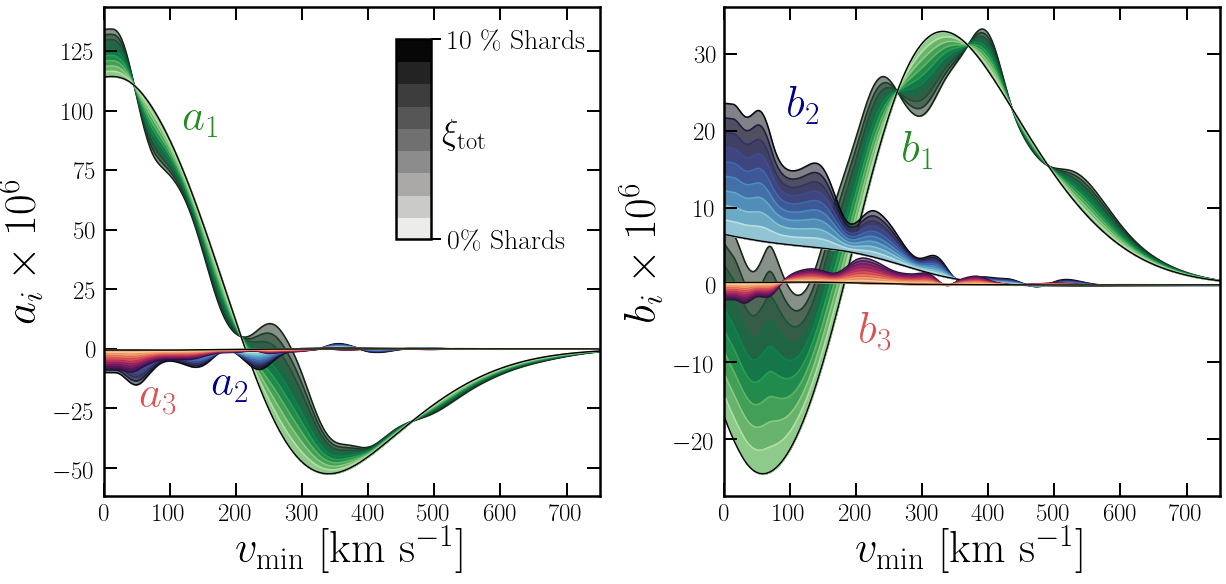

In [5]:
fig,ax1,ax2 = MyDoublePlot(r'$v_{\rm min}$ [km s$^{-1}$]',r'$a_i\times 10^6$',r'$v_{\rm min}$ [km s$^{-1}$]',r'$b_i\times 10^6$',size_y=9,wspace=0.25)


j = 0
zorder=0
col = (cmocean.cm.algae_r(linspace(0,1,n_xi)))
a0,a_1,b_1 = FourierComponents(gmin0_gf,nc) 
ay2 = a_1[j,:]
by2 = b_1[j,:]
for i in range(0,n_xi):
    xi = xi_vals[i]
    a0,a,b = FourierComponents((1-xi)*gmin0_gf+xi*gmin_sub_gf,nc)
    ax1.fill_between(v_min,sc*a[j,:],y2=sc*ay2,color=col[i,:],alpha=0.5,zorder=zorder)
    ax1.plot(v_min,sc*a[j,:],'-',color=col[i,:],zorder=zorder)
    ax2.fill_between(v_min,sc*b[j,:],y2=sc*by2,color=col[i,:],alpha=0.5,zorder=zorder)
    ax2.plot(v_min,sc*b[j,:],'-',color=col[i,:],zorder=zorder)
ax1.plot(v_min,sc*ay2,'k-',lw=1.5,zorder=zorder)
ax2.plot(v_min,sc*by2,'k-',lw=1.5,zorder=zorder)


zorder = zorder+1
j = 1
col = (cmocean.cm.ice(linspace(0,1,n_xi)))
a0,a_1,b_1 = FourierComponents(gmin0_gf,nc) 
ay2 = a_1[j,:]
by2 = b_1[j,:]
for i in range(0,n_xi):
    xi = xi_vals[i]
    a0,a,b = FourierComponents((1-xi)*gmin0_gf+xi*gmin_sub_gf,nc)
    ax1.fill_between(v_min,sc*a[j,:],y2=sc*ay2,color=col[i,:],alpha=0.5,zorder=zorder)
    ax1.plot(v_min,sc*a[j,:],'-',color=col[i,:],zorder=zorder)
    ax2.fill_between(v_min,sc*b[j,:],y2=sc*by2,color=col[i,:],alpha=0.5,zorder=zorder)
    ax2.plot(v_min,sc*b[j,:],'-',color=col[i,:],zorder=zorder)
ax1.plot(v_min,sc*ay2,'k-',lw=1.5,zorder=zorder)
ax2.plot(v_min,sc*by2,'k-',lw=1.5,zorder=zorder)


zorder = zorder+1
j = 2
col = (cmocean.cm.matter_r(linspace(0,1,n_xi)))
a0,a_1,b_1 = FourierComponents(gmin0_gf,nc) 
ay2 = a_1[j,:]
by2 = b_1[j,:]
for i in range(0,n_xi):
    xi = xi_vals[i]
    a0,a,b = FourierComponents((1-xi)*gmin0_gf+xi*gmin_sub_gf,nc)
    ax1.fill_between(v_min,sc*a[j,:],y2=sc*ay2,color=col[i,:],alpha=0.5,zorder=zorder)
    ax1.plot(v_min,sc*a[j,:],'-',color=col[i,:],zorder=zorder)
    ax2.fill_between(v_min,sc*b[j,:],y2=sc*by2,color=col[i,:],alpha=0.5,zorder=zorder)
    ax2.plot(v_min,sc*b[j,:],'-',color=col[i,:],zorder=zorder)
ax1.plot(v_min,sc*ay2,'k-',lw=1.5,zorder=zorder)
ax2.plot(v_min,sc*by2,'k-',lw=1.5,zorder=zorder)



ax1.set_xticks(arange(0,800,100))
ax2.set_xticks(arange(0,800,100))
ax1.set_xlim([0,750.0])
ax2.set_xlim([0,750.0])


# # Custom colorbar
cmap = cmocean.cm.gray_r
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
cbar_max = r'10 \% Shards'
cbar_min = r'0\% Shards'
cbaxes = inset_axes(ax1, width="5%", height="50%", bbox_to_anchor=[-180, 150, 700, 400]) 
norm = mpl.colors.Normalize(vmin=0,vmax=1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm,cax=cbaxes,ticks=(0,1),boundaries=linspace(0,1,n_xi))
f = plt.gcf().get_children()
cbar = f[3]
cbar.set_yticklabels([cbar_min, cbar_max])  # vertically oriented colorbar
cbar.tick_params(labelsize=28) 
cbar.tick_params(which='major',direction='out',width=2,length=10,right=True,top=False,pad=7)
cbar.tick_params(which='minor',direction='out',width=2,length=7,right=True,top=False)
plt.gcf().text(0.36,0.66,r'$\xi_{\rm tot}$',fontsize=35,color='k')


plt.gcf().text(0.18,0.68,'$a_1$',color='ForestGreen',fontsize=45)
plt.gcf().text(0.2,0.27,'$a_2$',color='DarkBlue',fontsize=45)
plt.gcf().text(0.15,0.25,'$a_3$',color=col[5,:],fontsize=45)

plt.gcf().text(0.68,0.63,'$b_1$',color='ForestGreen',fontsize=45)
plt.gcf().text(0.6,0.7,'$b_2$',color='DarkBlue',fontsize=45)
plt.gcf().text(0.65,0.35,'$b_3$',color=col[5,:],fontsize=45)

plt.show()


In [19]:
for i in range(0,nt):
    gmin0[i,:] = gvmin_Isotropic(v_min,t[i])

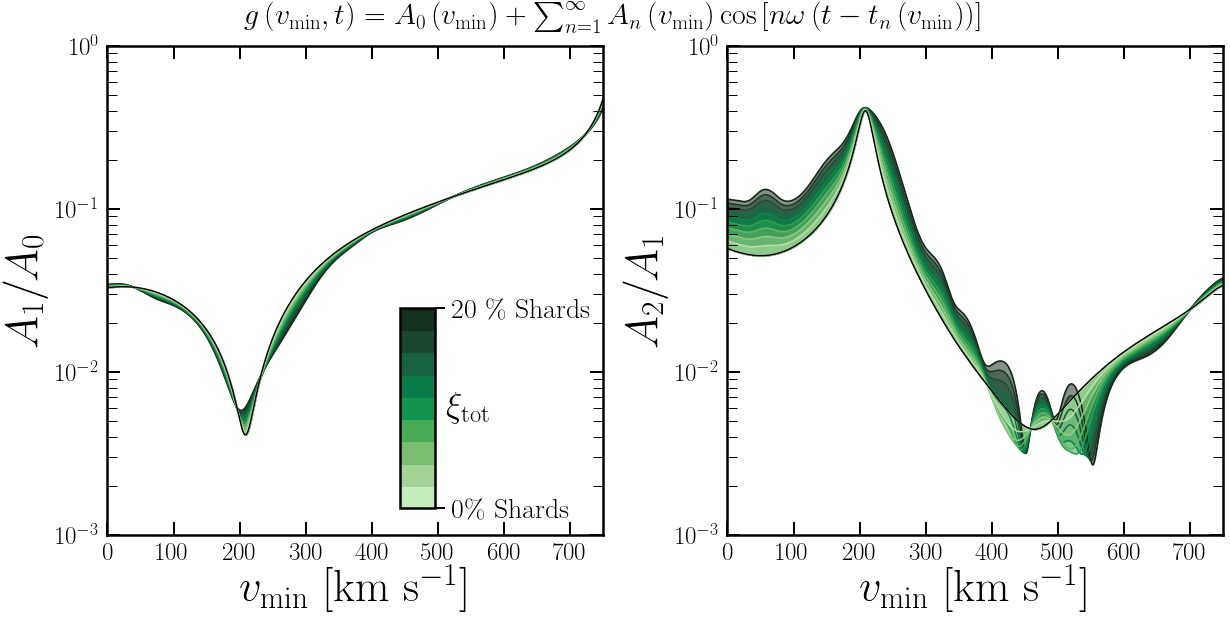

In [57]:
fig,ax1,ax2 = MyDoublePlot(r'$v_{\rm min}$ [km s$^{-1}$]',r'$A_1/A_0$',r'$v_{\rm min}$ [km s$^{-1}$]',r'$A_2/A_1$',size_y=9,wspace=0.25)

n_xi = 10
xi_max = 0.2
xi_vals = flipud(linspace(0.0,xi_max,n_xi))



j = 0
zorder=0
col = (cmocean.cm.algae_r(linspace(0,1,n_xi)))
A0_0,a_1,b_1 = FourierComponents(gmin0_gf,nc) 
A1_0 = sqrt(a_1[0,:]**2.0+b_1[0,:]**2.0)
A2_0 = sqrt(a_1[1,:]**2.0+b_1[1,:]**2.0)

for i in range(0,n_xi):
    xi = xi_vals[i]
    A0,a,b = FourierComponents((1-xi)*gmin0_gf+xi*gmin_sub_gf,nc)
    A1 = sqrt(a[0,:]**2.0+b[0,:]**2.0)
    A2 = sqrt(a[1,:]**2.0+b[1,:]**2.0)
    
    ax1.fill_between(v_min,A1/A0,y2=A1_0/A0_0,color=col[i,:],alpha=0.5,zorder=zorder)
    ax1.plot(v_min,A1/A0,'-',color=col[i,:],zorder=zorder)
    
    ax2.fill_between(v_min,A2/A1,y2=A2_0/A1_0,color=col[i,:],alpha=0.5,zorder=zorder)
    ax2.plot(v_min,A2/A1,'-',color=col[i,:],zorder=zorder)
    
ax1.plot(v_min,A1_0/A0_0,'k-',lw=1.5,zorder=zorder)
ax2.plot(v_min,A2_0/A1_0,'k-',lw=1.5,zorder=zorder)


ax1.set_yscale('log')
ax1.set_ylim([1e-3,1e0])
ax1.set_xlim([0,750])

ax2.set_yscale('log')
ax2.set_ylim([1e-3,1e0])
ax2.set_xlim([0,750])

ax1.set_xticks(arange(0,800,100))
ax2.set_xticks(arange(0,800,100))



# # Custom colorbar
plt.sca(ax2)
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
cbar_max = r'20 \% Shards'
cbar_min = r'0\% Shards'
cbaxes = inset_axes(ax2, width="5%", height="50%", bbox_to_anchor=[-180, -80, 700, 400]) 
norm = mpl.colors.Normalize(vmin=0,vmax=1)
sm = plt.cm.ScalarMappable(cmap=cmocean.cm.algae, norm=norm)
sm.set_array([])
plt.colorbar(sm,cax=cbaxes,ticks=(0,1),boundaries=linspace(0,1,n_xi))
f = plt.gcf().get_children()
cbar = f[3]
cbar.set_yticklabels([cbar_min, cbar_max])  # vertically oriented colorbar
cbar.tick_params(labelsize=28)
cbar.tick_params(which='major',direction='out',width=2,length=10,right=True,top=False,pad=7)
cbar.tick_params(which='minor',direction='out',width=2,length=7,right=True,top=False)
plt.gcf().text(0.36,0.3,r'$\xi_{\rm tot}$',fontsize=35,color='k')


eq = r'$g\left(v_{\min }, t\right)=A_{0}\left(v_{\min }\right)+\sum_{n=1}^{\infty} A_{n}\left(v_{\min }\right) \cos \left[n \omega\left(t-t_{n}\left(v_{\min }\right)\right)\right]$'
plt.gcf().text(0.22,0.9,eq,fontsize=30)

# Save figure
plt.show()
pltname = 'Shards_FourierA'
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')


/Users/ciaranohare/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log

/Users/ciaranohare/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in log



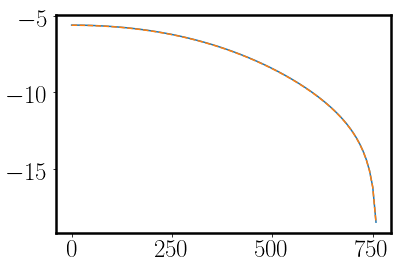

In [407]:
v_min = linspace(0.1,799.0,100)

def gvmin_Isotropic3(v_min,day,v_LSR=233.0,sig=164.75,v_esc=528.0,\
                        v_shift=array([0.0,0.0,0.0]),GravFocus=False,EscapeSpeed=True):
    v_lab = LabFuncs.LabVelocitySimple(day,v_LSR=v_LSR)-v_shift
    v_e = sqrt(sum(v_lab**2.0))
    v0 = sig*sqrt(2.0)
    N_esc = Nesc_Isotropic(sig,v_esc)

    v_e = LabFuncs.LabVelocitySimple(day,v_LSR=v_LSR)
    v_max = v_esc+sqrt(sum(v_e**2.0))
    v_off = v_e-v_shift
              
    nfine = 1000
    v_min_fine = flipud(linspace(0.0001,800.0,nfine))
    dv = v_min_fine[1]-v_min_fine[2]
    gvmin = zeros(shape=shape(v_min_fine))
    gvmin[0] = 0.0
    for i in range(1,nfine):
        v1 = v_min_fine[i]
        vr = v1*sqrt(1-C**2.0)*cos(P)-v_off[0]
        vphi = v1*sqrt(1-C**2.0)*sin(P)-v_off[1]
        vz = v1*C-v_off[2]
        V = sqrt(vr**2.0+vphi**2.0+vz**2.0)
        #Voff = sqrt((vr-v_off[0])**2.0+(vphi-v_off[1])**2.0+(vz-v_off[2])**2.0)
        F  = N*exp(-(vr**2.0/(2*sig**2.0))\
                   -(vz**2.0/(2*sig**2.0))\
                   -(vphi**2.0/(2*sig**2.0)))*(V<v_esc)
        gvmin[i] = dth*dph*sum(sum(F))/v1
    gvmin[0:-1] = flipud(cumtrapz(gvmin*v_min_fine**2.0,flipud(v_min_fine)))
    gvmin[-1] = 0.0
    gvmin = interp(v_min,flipud(v_min_fine),gvmin)
    return gvmin

def gvmin_Isotropic2(v_min,day,v_LSR=233.0,sig=164.75,v_esc=528.0,\
                    v_shift=array([0.0,0.0,0.0]),GravFocus=False,v_exponent=-1.0):
    # If Grav focus being ignored and exponent=-1, can use analytic result
    v_lab = LabFuncs.LabVelocitySimple(day,v_LSR=v_LSR)-v_shift
    N_esc = Nesc_Isotropic(sig,v_esc)
    v_e = sqrt(sum(v_lab**2.0))
    v0 = sig*sqrt(2.0)
    x = v_min/v0
    z = v_esc/v0
    y = v_e/v0

    gvmin = zeros(shape=shape(v_min))
    g1 = (1.0/(v0*y))
    g2 = (1.0/(2.0*N_esc*v0*y))*(erf(x+y)-erf(x-y)-(4.0/sqrt(pi))*y*exp(-z**2))
    g3 = (1.0/(2.0*N_esc*v0*y))*(erf(z)-erf(x-y)-(2.0/sqrt(pi))*(y+z-x)*exp(-z**2))
    gvmin[(x<abs(y-z))&(z<y)] = g1
    gvmin[(x<abs(y-z))&(z>y)] = g2[(x<abs(y-z))&(z>y)]
    gvmin[(abs(y-z)<x)&(x<(y+z))] = g3[(abs(y-z)<x)&(x<(y+z))]
    gvmin[(y+z)<x] = 0.0
    
    return gvmin

day = 0
f1 = gvmin_Isotropic3(v_min,day)
f2 = gvmin_Isotropic2(v_min,day)

plt.plot(v_min,log(f1))
plt.plot(v_min,log(f2),'--')
plt.plot()
plt.show()